In [24]:
import pandas as pd, numpy as np

In [25]:
df=pd.read_csv('hu.csv')
df['time']=pd.to_datetime(df['time'])
df=df.set_index('time')
df=df.sort_index()

In [ ]:
nepi=pd.read_excel('idojaras.xlsx')

Setup plot params

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [311]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
path = 'KulimPark-Regular.ttf'
path2 = 'Symbola.ttf'
prop = font_manager.FontProperties(fname=path)
prop2 = font_manager.FontProperties(fname=path2)

In [329]:
color_none='#E7CFBC'
color_none2='#F2B880'
color_ax=color_none
color_plus='#C98686'
color_minus='#966B9D'
color_good='#4d9221'
color_bad='#c51b7d'
color_bg='#FFF4EC'
font_size=12
s=40
m1={'Temp':'☼'}
m2={'Temp':'❄️'}
m3={'Temp':'♨️','Rain':'☂️','Snow':'⛷️'}

In [330]:
def spine_plot(title,mondas,kondicio,mennyiseg,prediction_ts,observation_ratio_good,observation_ratio_bad,ertek_is_plus,good_is_plus,axv1=0,axv2=0,tp=False):
    y=prediction_ts.values
    x=prediction_ts.index
    fig,axes=plt.subplots(1,3,figsize=(8,5),gridspec_kw={'width_ratios': [1, 3, 2]})
    ax=axes[1]
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=color_none)
    ax.scatter(y,x,s,color=color_none,zorder=10)
    ex=max(y)-min(y)
    text_off=abs(ex*0.04)
    text_align='left'
    if y[0]<0:
        text_off=-text_off
        text_align='right'
    ax.text(y[0]+text_off, x[0], str(x[0]), fontsize=font_size*0.9, 
            horizontalalignment=text_align, verticalalignment='center', 
            color=color_none, fontproperties=prop)
    text_off=abs(text_off)
    text_align='left'
    if y[-1]<0:
        text_off=-text_off
        text_align='right'
    ax.text(y[-1]+text_off, x[-1], str(x[-1]), fontsize=font_size*0.9, 
            horizontalalignment=text_align, verticalalignment='center', 
            color=color_none, fontproperties=prop)
    
    y=prediction_ts.loc[observation_ratio_bad.index].values
    x=prediction_ts.loc[observation_ratio_bad.index].index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=color_none)
    ax.scatter(y,x,s,color=color_none,zorder=10)
    

    z=prediction_ts.loc[observation_ratio_good.index]
    z1=z[z>=axv2].dropna()
    z2=z[z<axv2].dropna()
    y=z1.values
    x=z1.index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=color_plus)
    ax.scatter(y,x,s,color=color_plus,zorder=12)
    y=z2.values
    x=z2.index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=color_minus)
    ax.scatter(y,x,s,color=color_minus,zorder=11)

    if good_is_plus:
        plus=color_good
        minus=color_bad
        plus_glyph='✔️'
        minus_glyph='✖️'
    else:
        plus=color_bad
        minus=color_good
        plus_glyph='✖️'
        minus_glyph='✔️'
    
    ax.set_ylim(1965,2020)
    ax.axvline(axv2,color=color_ax)
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.axis('off')
    ax.text(ex*0.1, 1966, str(len(z1)), fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop)
    ax.text(ex*0.02, 1966, plus_glyph, fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop2)
    ax.text(-ex*0.1, 1966, str(len(z2)), fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop)
    ax.text(-ex*0.02, 1966, minus_glyph, fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop2)
    ax.text(ex*0.02, 2021, m1[mennyiseg], 
            horizontalalignment='left', color=color_plus, fontproperties=prop2, fontsize=font_size*1.5)
    ax.text(-ex*0.02, 2021, m2[mennyiseg],
            horizontalalignment='right', color=color_minus, fontproperties=prop2, fontsize=font_size*1.5)
    
    
    if len(z1)>len(z2):
        color_title=plus
    else:
        color_title=minus
    
    
    if ertek_is_plus:
        plus=color_none2
        minus=color_none
        plus_glyph='✔️'
        minus_glyph='✖️'
    else:
        plus=color_none
        minus=color_none2
        plus_glyph='✖️'
        minus_glyph='✔️'
        
    ax=axes[0]
    z=pd.concat([observation_ratio_good,observation_ratio_bad])
    ex=max(z.values)-min(z.values)
    z1=z[z>=axv1].dropna()
    z2=z[z<axv1].dropna()
    y=z1.values
    x=z1.index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=plus)
    ax.scatter(y,x,s*0.4,color=plus,zorder=12)
    ax.text(ex*0.25, 1966, str(len(z1)), fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop)
    ax.text(ex*0.04, 1966, plus_glyph, fontsize=font_size, 
            horizontalalignment='left', color=plus, fontproperties=prop2)
    y=z2.values
    x=z2.index
    for i,e in enumerate(y):
        ax.plot([0,e],[x[i],x[i]],color=minus)
    ax.scatter(y,x,s*0.4,color=minus,zorder=11)
    ax.text(-ex*0.25, 1966, str(len(z2)), fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop)
    ax.text(-ex*0.04, 1966, minus_glyph, fontsize=font_size, 
            horizontalalignment='right', color=minus, fontproperties=prop2)
    ax.text(axv1, 2022, m3[kondicio], 
            horizontalalignment='center', color=color_none2, fontproperties=prop2, fontsize=font_size*1.5)
    
    
    ax.set_ylim(1965,2020)
    ax.axvline(0,color=color_ax)
    ax.plot([axv1,axv1],[1971,2020],color=color_none2,ls='--')
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.axis('off')
    
    ax= axes[2].inset_axes([0, 0.25, 1, 0.5])
    x=observation_ratio_good.values
    y=prediction_ts.loc[observation_ratio_good.index].values
    if good_is_plus:
        plus=color_good
        minus=color_bad
    else:
        plus=color_bad
        minus=color_good
    colors=[plus if i>0 else minus for i in y]
    if not ertek_is_plus: x=-x
    if not good_is_plus: y=-y
    x-=min(x)
    x/=max(x)
    y-=min(y)
    y/=max(y)
    ax.plot([-0.1,-0.1],[-0.1,1.1],color=color_none)
    ax.plot([-0.1,1.1],[-0.1,-0.1],color=color_none)
    ax.plot([-0.1,1.1],[-0.1,1.1],color=color_none,ls='--')
    ax.text(1.15, -0.1, m3[kondicio], verticalalignment='center',
            horizontalalignment='left', color=color_none, fontproperties=prop2, fontsize=font_size*1.3)
    ax.text(-0.1, 1.15, m3[mennyiseg], verticalalignment='bottom',
            horizontalalignment='center', color=color_none, fontproperties=prop2, fontsize=font_size*1.3)
    
    ax.scatter(x,y,s*0.4,color=colors,zorder=10)
    ax.axis('off')
    
    ax=axes[2]
    ax.axis('off')
    
    plt.suptitle(title,y=0.08,color=color_title,fontproperties=prop)
    # ax.text(0, 1960, title, fontsize=font_size, horizontalalignment='center', color=color_ax)
    
#     plt.savefig(str(mondas)+'.png',dpi=300, transparent=tp)
    plt.savefig(str(mondas)+'.png',dpi=300, facecolor=color_bg)
    plt.show()

In [331]:
rainy_cutoff=0.1
temp_cutoff=2

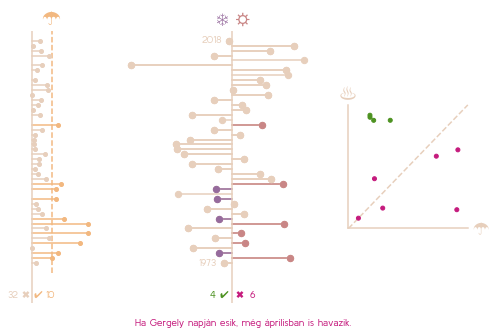

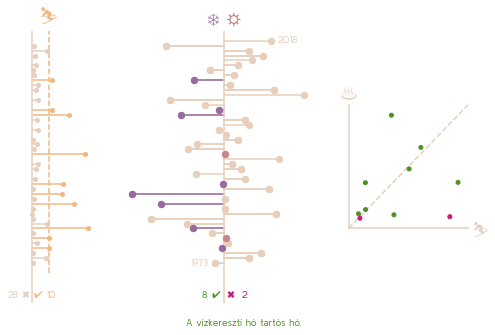

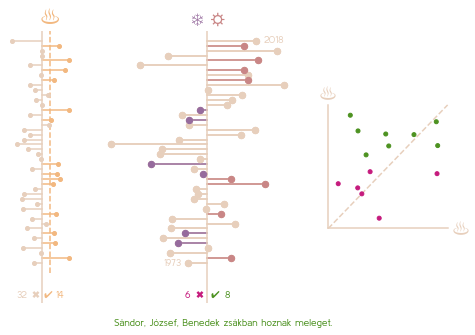

In [332]:
mondasok=[11,0,14]#,0,14,33,34,35,36]
for mondas in mondasok:
    nep=nepi.loc[mondas]
    observation_range=[nep['Dátum:mettől']+pd.to_timedelta('-1D'),nep['Dátum:meddig']+pd.to_timedelta('+2D')]
    prediction_range=[nep['Periódus:mettől'],nep['Periódus:meddig']+pd.to_timedelta('+1D')]
    
    dgs=[]
    dhs=[]
    axv1=0
    axv2=0
    for year in range(1973,2019):
        k=0
        from_date=pd.to_datetime(str(year)+'-'+str(observation_range[k].month)+'-'+str(observation_range[k].day))
        from_pred=pd.to_datetime(str(year)+'-'+str(prediction_range[k].month)+'-'+str(prediction_range[k].day))
        k=1
        to_date=pd.to_datetime(str(year)+'-'+str(observation_range[k].month)+'-'+str(observation_range[k].day))
        to_pred=pd.to_datetime(str(year)+'-'+str(prediction_range[k].month)+'-'+str(prediction_range[k].day))
        if to_pred<to_date:
            to_pred+=pd.to_timedelta('1Y')
        dg=df.loc[from_date:]
        dg=dg[:to_date]
        dgs.append(dg)
        dh=df.loc[from_pred:]
        dh=dh[:to_pred]
        dhs.append(dh)
    observation_data=pd.concat(dgs)
    prediction_data=pd.concat(dhs)
    
    if nep['Érték'] in ['+','>0']:
        ertek_is_plus=True
    else:
        ertek_is_plus=False
        
    if nep['Irány'] in ['+','>0']:
        good_is_plus=True
    else:
        good_is_plus=False
        
    if nep['Kondíció'] in ['Rain','Snow']:
        if nep['Kondíció']=='Rain':
            obs_key=6
        if nep['Kondíció']=='Snow':
            obs_key=7
        axv1=rainy_cutoff
        observation_total=observation_data.groupby(['year']).count()[['hour']]
        observation_total.columns=['total']
        observation_ratio=observation_data.groupby(['year','W']).count()[['hour']].join(observation_total)
        observation_ratio['ratio']=observation_ratio['hour']/observation_ratio['total']
        observation_ratio=observation_ratio.reset_index().set_index(['W','year']).loc[obs_key][['ratio']]
        observation_ratio_good=observation_ratio[observation_ratio['ratio']>rainy_cutoff].dropna()
        observation_ratio_bad=observation_ratio[observation_ratio['ratio']<=rainy_cutoff].dropna()

        if nep['Mennyiség']=='Temp':
            pred_key='TEMP'
        pred_all=prediction_data.groupby('year').mean()[pred_key]
        prediction_ts=pred_all-pred_all.mean()
    elif nep['Kondíció']=='Temp':
        obs_key='TEMP'
        temp_cutoff=abs(temp_cutoff)
        observation_data.groupby('year').mean()[obs_key] 
        observation_total=observation_data.mean()[obs_key]
        observation_ratio=observation_data.groupby('year').mean()[obs_key]
        observation_ratio=observation_ratio-observation_total
        if ertek_is_plus:
            observation_ratio_good=observation_ratio[observation_ratio>temp_cutoff].dropna()
            observation_ratio_bad=observation_ratio[observation_ratio<=temp_cutoff].dropna()
        else:
            temp_cutoff=-temp_cutoff
            observation_ratio_good=observation_ratio[observation_ratio<temp_cutoff].dropna()
            observation_ratio_bad=observation_ratio[observation_ratio>=temp_cutoff].dropna()
        axv1=temp_cutoff
        
        if nep['Mennyiség']=='Temp':
            pred_key='TEMP'
        pred_all=prediction_data.groupby('year').mean()[pred_key]
        prediction_ts=pred_all-pred_all.mean()
            
    spine_plot(nep['Mondás'].strip(),mondas,nep['Kondíció'],nep['Mennyiség'],prediction_ts,observation_ratio_good,observation_ratio_bad,ertek_is_plus,good_is_plus,axv1,axv2)